# Features Engineering

Dans cette section, nous allons effectuer l'ingénierie des caractéristiques sur notre dataset. Cette étape est cruciale pour transformer et créer de nouvelles variables qui pourront améliorer les performances de nos modèles. Nous allons créer des features pertinentes, normaliser les données si nécessaire, et préparer notre dataset pour la phase de modélisation.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('../RAW_data/clean_data/expeditionsV2.csv', sep=",")
data.head()

,id_expedition,id_commande,id_produit,quantité,entrepôt,date_expedition,date_livraison,transporteur,coût_transport,délai_livraison
0,SHP000001,O000001,P00413,2,Marseille,09/09/2024,15/09/2024,UPS,11.62,6
1,SHP000002,O000002,P00778,15,Lyon,16/11/2024,23/11/2024,Chronopost,13.61,7
2,SHP000003,O000004,P00535,8,Lyon,06/11/2024,09/11/2024,FedEx,19.32,3
3,SHP000004,O000006,P00898,3,Paris,26/01/2024,28/01/2024,DHL,14.79,2
4,SHP000005,O000007,P00445,1,Lyon,18/02/2024,21/02/2024,FedEx,13.56,3


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42404 entries, 0 to 42403
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_expedition    42404 non-null  object 
 1   id_commande      42404 non-null  object 
 2   id_produit       42404 non-null  object 
 3   quantité         42404 non-null  int64  
 4   entrepôt         42404 non-null  object 
 5   date_expedition  42404 non-null  object 
 6   date_livraison   42404 non-null  object 
 7   transporteur     42404 non-null  object 
 8   coût_transport   42404 non-null  float64
 9   délai_livraison  42404 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 3.2+ MB


In [67]:
# Calculer le coût par unité et l'ajouter comme nouvelle colonne
data['coût_trsp_par_unité'] = data['coût_transport'] / data['quantité']

# Afficher les statistiques des résultats
print("Statistiques du coût de transport par unité:")
print(data['coût_trsp_par_unité'].describe())

data.head()

Statistiques du coût par unité:
count    42404.000000
mean         5.792773
std          3.877353
min          0.692000
25%          2.411250
50%          4.910000
75%          7.975000
max         14.500000
Name: coût_trsp_par_unité, dtype: float64


,id_expedition,id_commande,id_produit,quantité,entrepôt,date_expedition,date_livraison,transporteur,coût_transport,délai_livraison,coût_trsp_par_unité
0,SHP000001,O000001,P00413,2,Marseille,09/09/2024,15/09/2024,UPS,11.62,6,5.810000
1,SHP000002,O000002,P00778,15,Lyon,16/11/2024,23/11/2024,Chronopost,13.61,7,0.907333
2,SHP000003,O000004,P00535,8,Lyon,06/11/2024,09/11/2024,FedEx,19.32,3,2.415000
3,SHP000004,O000006,P00898,3,Paris,26/01/2024,28/01/2024,DHL,14.79,2,4.930000
4,SHP000005,O000007,P00445,1,Lyon,18/02/2024,21/02/2024,FedEx,13.56,3,13.560000


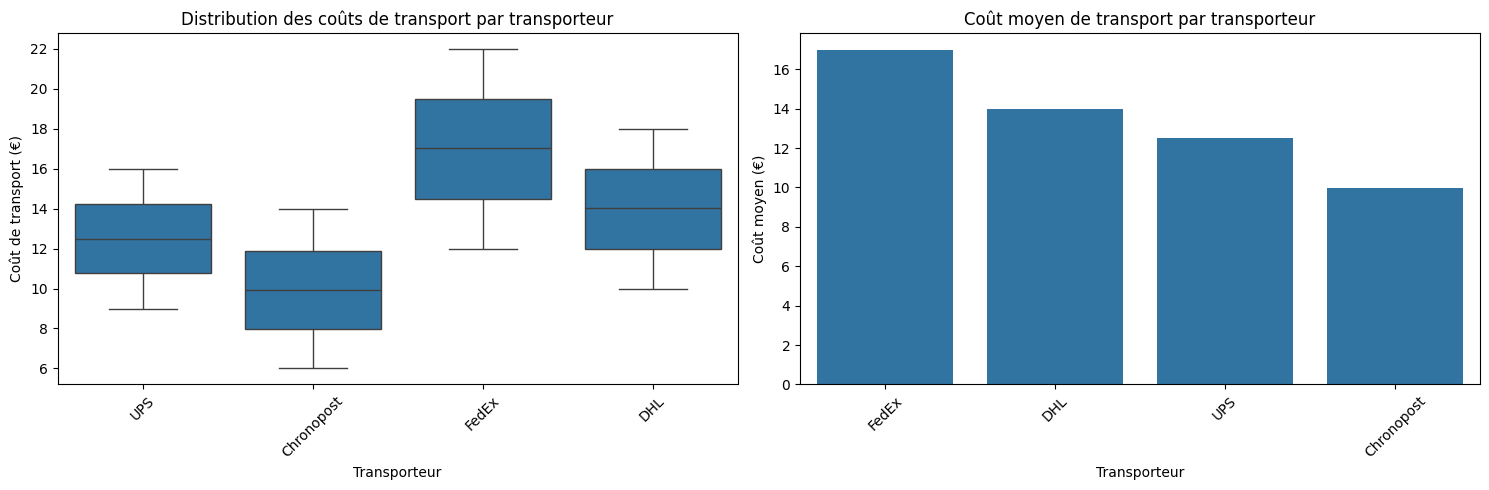

In [68]:
# Créer une figure avec plusieurs sous-graphiques
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Diagramme en boîte des coûts de transport par transporteur
sns.boxplot(data=data, x='transporteur', y='coût_transport', ax=ax1)
ax1.set_title('Distribution des coûts de transport par transporteur')
ax1.set_xlabel('Transporteur')
ax1.set_ylabel('Coût de transport (€)')
ax1.tick_params(axis='x', rotation=45)

# Diagramme en barres des coûts moyens de transport par transporteur
avg_cost = data.groupby('transporteur')['coût_transport'].mean().sort_values(ascending=False)
sns.barplot(x=avg_cost.index, y=avg_cost.values, ax=ax2)
ax2.set_title('Coût moyen de transport par transporteur')
ax2.set_xlabel('Transporteur')
ax2.set_ylabel('Coût moyen (€)')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [69]:
data['date_expedition'] = pd.to_datetime(data['date_expedition'], format='%d/%m/%Y')
data['date_livraison'] = pd.to_datetime(data['date_livraison'], format='%d/%m/%Y')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42404 entries, 0 to 42403
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id_expedition        42404 non-null  object        
 1   id_commande          42404 non-null  object        
 2   id_produit           42404 non-null  object        
 3   quantité             42404 non-null  int64         
 4   entrepôt             42404 non-null  object        
 5   date_expedition      42404 non-null  datetime64[ns]
 6   date_livraison       42404 non-null  datetime64[ns]
 7   transporteur         42404 non-null  object        
 8   coût_transport       42404 non-null  float64       
 9   délai_livraison      42404 non-null  int64         
 10  coût_trsp_par_unité  42404 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(2), object(5)
memory usage: 3.6+ MB


In [70]:
data['avg_delay_transporteur'] = data.groupby('transporteur')['délai_livraison'] \
                                  .transform('mean')  
# → Référence du délai attendu pour chaque transporteur

data.head()

,id_expedition,id_commande,id_produit,quantité,entrepôt,date_expedition,date_livraison,transporteur,coût_transport,délai_livraison,coût_trsp_par_unité,avg_delay_transporteur
0,SHP000001,O000001,P00413,2,Marseille,2024-09-09,2024-09-15,UPS,11.62,6,5.810000,4.984788
1,SHP000002,O000002,P00778,15,Lyon,2024-11-16,2024-11-23,Chronopost,13.61,7,0.907333,6.497407
2,SHP000003,O000004,P00535,8,Lyon,2024-11-06,2024-11-09,FedEx,19.32,3,2.415000,3.503904
3,SHP000004,O000006,P00898,3,Paris,2024-01-26,2024-01-28,DHL,14.79,2,4.930000,2.000000
4,SHP000005,O000007,P00445,1,Lyon,2024-02-18,2024-02-21,FedEx,13.56,3,13.560000,3.503904


In [71]:
data['on_time_delivery'] = (data['délai_livraison'] <= data['avg_delay_transporteur']).astype(int)  
#  Indicateur binaire de respect du délai interne

data.head()

,id_expedition,id_commande,id_produit,quantité,entrepôt,date_expedition,date_livraison,transporteur,coût_transport,délai_livraison,coût_trsp_par_unité,avg_delay_transporteur,on_time_delivery
0,SHP000001,O000001,P00413,2,Marseille,2024-09-09,2024-09-15,UPS,11.62,6,5.810000,4.984788,0
1,SHP000002,O000002,P00778,15,Lyon,2024-11-16,2024-11-23,Chronopost,13.61,7,0.907333,6.497407,0
2,SHP000003,O000004,P00535,8,Lyon,2024-11-06,2024-11-09,FedEx,19.32,3,2.415000,3.503904,1
3,SHP000004,O000006,P00898,3,Paris,2024-01-26,2024-01-28,DHL,14.79,2,4.930000,2.000000,1
4,SHP000005,O000007,P00445,1,Lyon,2024-02-18,2024-02-21,FedEx,13.56,3,13.560000,3.503904,1


In [72]:
data['mois_expedition'] = data['date_expedition'].dt.month  
#  Pour analyser les volumes par mois

data.head()

,id_expedition,id_commande,id_produit,quantité,entrepôt,date_expedition,date_livraison,transporteur,coût_transport,délai_livraison,coût_trsp_par_unité,avg_delay_transporteur,on_time_delivery,mois_expedition
0,SHP000001,O000001,P00413,2,Marseille,2024-09-09,2024-09-15,UPS,11.62,6,5.810000,4.984788,0,9
1,SHP000002,O000002,P00778,15,Lyon,2024-11-16,2024-11-23,Chronopost,13.61,7,0.907333,6.497407,0,11
2,SHP000003,O000004,P00535,8,Lyon,2024-11-06,2024-11-09,FedEx,19.32,3,2.415000,3.503904,1,11
3,SHP000004,O000006,P00898,3,Paris,2024-01-26,2024-01-28,DHL,14.79,2,4.930000,2.000000,1,1
4,SHP000005,O000007,P00445,1,Lyon,2024-02-18,2024-02-21,FedEx,13.56,3,13.560000,3.503904,1,2


In [73]:

data.head()

,id_expedition,id_commande,id_produit,quantité,entrepôt,date_expedition,date_livraison,transporteur,coût_transport,délai_livraison,coût_trsp_par_unité,avg_delay_transporteur,on_time_delivery,mois_expedition
0,SHP000001,O000001,P00413,2,Marseille,2024-09-09,2024-09-15,UPS,11.62,6,5.810000,4.984788,0,9
1,SHP000002,O000002,P00778,15,Lyon,2024-11-16,2024-11-23,Chronopost,13.61,7,0.907333,6.497407,0,11
2,SHP000003,O000004,P00535,8,Lyon,2024-11-06,2024-11-09,FedEx,19.32,3,2.415000,3.503904,1,11
3,SHP000004,O000006,P00898,3,Paris,2024-01-26,2024-01-28,DHL,14.79,2,4.930000,2.000000,1,1
4,SHP000005,O000007,P00445,1,Lyon,2024-02-18,2024-02-21,FedEx,13.56,3,13.560000,3.503904,1,2


In [75]:
data.to_csv('Export_fe_data/expeditions_merged_features.csv', index=False, sep=',')